# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Среднее специальное', 'Два и более высших образования', 'Высшее', 'Неполное среднее'}


MARITAL_STATUS
{'Состою в браке', 'Гражданский брак', 'Разведен(а)', 'Вдовец/Вдова', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Сельское хозяйство', 'Наука', 'Туризм', 'Подбор персонала', 'Образование', 'Банк/Финансы', 'Торговля', 'Другие сферы', 'Ресторанный бизнес/Общественное питание', 'Транспорт', 'Страхование', 'Салоны красоты и здоровья', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Логистика', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Информационные технологии', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Государственная служба', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Строительство', 'Развлечения/Искусство', 'Маркетинг', 'Недвижимость'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
#В строке 'Work_time' заполнено достаточно много значений, значительно больше половины и они могут влиять на результат, 
# поэтому заполним их медианой
df.loc[df['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()


In [16]:
# Согласно описанию - если в столбце PREVIOUS_CARD_NUM_UTILIZED пусто, то значение - 0
df.loc[df['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [17]:
#найдем сколько значений принимает каждое из полей типа object
for i in df.columns:
     if str(df_train[i].dtype) == 'object':
        s = ''
        s += i
        s += '  - принимает ' + str(df[i].nunique()) + ' значений'
        print (s)

EDUCATION  - принимает 7 значений
MARITAL_STATUS  - принимает 5 значений
GEN_INDUSTRY  - принимает 31 значений
GEN_TITLE  - принимает 12 значений
ORG_TP_STATE  - принимает 5 значений
ORG_TP_FCAPITAL  - принимает 2 значений
JOB_DIR  - принимает 10 значений
FAMILY_INCOME  - принимает 5 значений
PERSONAL_INCOME  - принимает 373 значений
REG_ADDRESS_PROVINCE  - принимает 82 значений
FACT_ADDRESS_PROVINCE  - принимает 83 значений
POSTAL_ADDRESS_PROVINCE  - принимает 82 значений
TP_PROVINCE  - принимает 70 значений
REGION_NM  - принимает 11 значений
CREDIT  - принимает 12911 значений
FST_PAYMENT  - принимает 4655 значений
LOAN_AVG_DLQ_AMT  - принимает 1942 значений
LOAN_MAX_DLQ_AMT  - принимает 1669 значений
sample  - принимает 2 значений


In [18]:
#цикл выше не учитывает null, с первого взгляда это не очевидно, поэтому вывел значения одного из полей
print(set(df_train['ORG_TP_FCAPITAL']))

{nan, 'С участием', 'Без участия'}


Я решил рассматирвать только те категориальные признаки где не более 5 значений, для уточнения модели - можно перекодировать все остальные

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
#так как в большинстве случаев пропущены поля у одних и тех же пользоватлей и заполненных гораздо больше половины
#- оставляем только тех, у кого все поля заполнены
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE', 'REGION_NM', 'TP_PROVINCE', 'JOB_DIR', 'GEN_TITLE', 'GEN_INDUSTRY', 'EDUCATION'], axis=1)
    df_output = df_output[~df['ORG_TP_FCAPITAL'].isnull()]
    df_output = pd.get_dummies(df_output, columns=['MARITAL_STATUS', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'FAMILY_INCOME'])
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    return df_output

In [20]:
df_preproc = df.pipe(preproc_data)


In [21]:
#Проверяем значения полей
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27425 entries, 0 to 30132
Data columns (total 56 columns):
TARGET                                         27425 non-null int64
AGE                                            27425 non-null int64
SOCSTATUS_WORK_FL                              27425 non-null int64
SOCSTATUS_PENS_FL                              27425 non-null int64
GENDER                                         27425 non-null int64
CHILD_TOTAL                                    27425 non-null int64
DEPENDANTS                                     27425 non-null int64
PERSONAL_INCOME                                27425 non-null float64
REG_FACT_FL                                    27425 non-null int64
FACT_POST_FL                                   27425 non-null int64
REG_POST_FL                                    27425 non-null int64
REG_FACT_POST_FL                               27425 non-null int64
REG_FACT_POST_TP_FL                            27425 non-null int64
FL_PR

In [22]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [23]:
y=df_train_preproc['TARGET']
y_test=df_test_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test=df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [24]:
#from sklearn.cross_validation import train_test_split - не люблю ворнинги =)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [26]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)                      # обучаем модель
predict_rfc = rfc.predict(X_test)    
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))
p_rfc = precision_score(y_test, predict_rfc)
r_rfc = recall_score(y_test, predict_rfc)
a_rfc = accuracy_score(y_test, predict_rfc)


precision 0.25
recall 0.012367491166077738
accuracy 0.8731963270660253


In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)                      # обучаем модель
predict_dtc = dtc.predict(X_test)    
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
p_dtc = precision_score(y_test, predict_dtc)
r_dtc = recall_score(y_test, predict_dtc)
a_dtc = accuracy_score(y_test, predict_dtc)

precision 0.17488789237668162
recall 0.2067137809187279
accuracy 0.7811543506777437


In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)                      # обучаем модель
predict_lr = lr.predict(X_test)    
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))
p_lr = precision_score(y_test, predict_lr)
r_lr = recall_score(y_test, predict_lr)
a_lr = accuracy_score(y_test, predict_lr)

precision 0.0
recall 0.0
accuracy 0.8760384783559247


In [29]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
precision = [p_rfc, p_dtc, p_lr]
recall = [r_rfc, r_dtc, r_lr]
accuracy =[a_rfc, a_dtc, a_lr] 
model=['RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegression' ]
m_df = pd.DataFrame(
    {'Model':model,
    'Precision': precision,
    'Recall': recall,
    'Accuracy': accuracy,})
m_df

#я решил положить все значения метрик в DataFrame чтобы с ними было легче работать

,Model,Precision,Recall,Accuracy
0,RandomForestClassifier,0.250000,0.012367,0.873196
1,DecisionTreeClassifier,0.174888,0.206714,0.781154
2,LogisticRegression,0.000000,0.000000,0.876038


([<matplotlib.axis.XTick at 0x182a1f4ca20>,
 <a list of 3 Text xticklabel objects>)

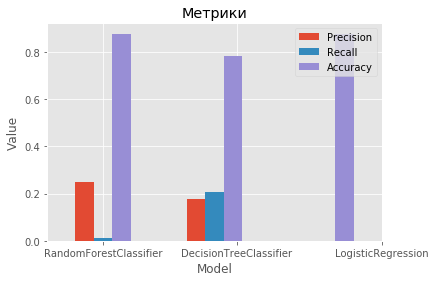

In [30]:
m_df.plot(kind='bar');
plt.title('Метрики');
plt.legend(loc='upper right')
plt.ylabel("Value")
plt.xlabel('Model')
plt.xticks([0, 1.2, 2.5], ['RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegression'], rotation='horizontal')
#plt.xlim((-0.5, 3))
#plt.ylim((0, 1.5))

In [31]:
predict_proba_rfc = rfc.predict_proba(X_test)
print(predict_proba_rfc[:,1])
predict_proba_dtc = dtc.predict_proba(X_test)
print(predict_proba_dtc[:,1])
predict_proba_lr = lr.predict_proba(X_test)
print(predict_proba_lr[:,1])

[0.3 0.  0.4 ... 0.  0.1 0. ]
[0. 0. 1. ... 0. 0. 1.]
[0.21696816 0.24961682 0.2894668  ... 0.10284167 0.19523219 0.23899394]


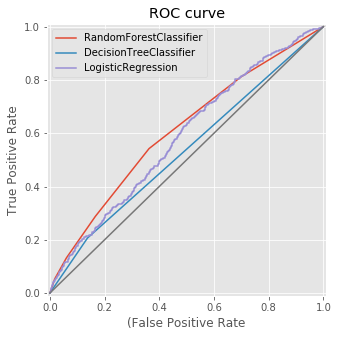

roc_auc для RandomForestClassifier 0.6084233917324361
roc_auc для DecisionTreeClassifier 0.5344946150102622
roc_auc для LogisticRegression 0.585074991360036


In [32]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict_proba_rfc[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba_dtc[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba_lr[:,1])

plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)

plt.plot([0, 1], [0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('(False Positive Rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['RandomForestClassifier',
            'DecisionTreeClassifier',
            'LogisticRegression'],
            loc='upper left')


plt.show()
print ('roc_auc для RandomForestClassifier', roc_auc_score(y_test, predict_proba_rfc[:,1]))
print ('roc_auc для DecisionTreeClassifier', roc_auc_score(y_test, predict_proba_dtc[:,1]))
print ('roc_auc для LogisticRegression', roc_auc_score(y_test, predict_proba_lr[:,1]))

In [33]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here


cvs_RFC = cross_val_score(
    RandomForestClassifier(),
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели RandomForestClassifier', np.mean(cvs_RFC))

cvs_DTC = cross_val_score(
    DecisionTreeClassifier(),
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели DecisionTreeClassifier', np.mean(cvs_DTC))


cvs_LR = cross_val_score(
    LogisticRegression(),
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели LogisticRegression', np.mean(cvs_LR))

Среднее значение roc_auc для модели RandomForestClassifier 0.5875909793604511
Среднее значение roc_auc для модели DecisionTreeClassifier 0.5230781211494404
Среднее значение roc_auc для модели LogisticRegression 0.6128111192591936


In [34]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

model = LogisticRegression()                     
model.fit(X, y)                      
predict = model.predict(X_test)  
predict_proba = model.predict_proba(X_test)
predict_proba[:,1]

array([0.2080326 , 0.24999434, 0.28700883, ..., 0.10709898, 0.18375097,
       0.22439044])

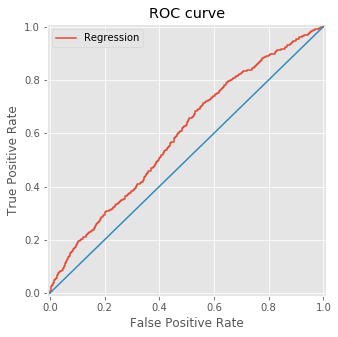

roc_auc для LogisticRegression 0.5919195178547498


In [35]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])


plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['Regression'],
            loc='upper left')


plt.show()
print ('roc_auc для LogisticRegression', roc_auc_score(y_test, predict_proba[:,1]))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [36]:
### И далее ;)